<a href="https://colab.research.google.com/github/nainye/nlp_practice/blob/main/Sentiment_Analysis_for_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVN

In [1]:
import numpy as np # 행렬 연산
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

In [3]:
sentences

['나는 오늘 기분이 좋아', '나는 오늘 우울해']

In [4]:
labels

[[1, 1, 1, 2], [1, 1, 0]]

In [5]:
id_to_label[0]

'부정'

## Vocabulary

In [6]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
  print(sentence.split())
  words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아']
['나는', '오늘', '우울해']


['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [7]:
dict.fromkeys(words)

{'기분이': None, '나는': None, '오늘': None, '우울해': None, '좋아': None}

In [8]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [9]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]':0, '[UNK]':1} # PAD - 길이를 조절할 때 / UNK - vocab에 없는 단어
for word in words:
  word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [10]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [11]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
  train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [12]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
  row += [0] * (4-len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [13]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [14]:
# train label은 labels를 그대로 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [15]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
  row += [1] * (4-len(row)) # padding을 중립(1)으로 넣어줌
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [16]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [17]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8) # n_vocab, d_model
hidden = embedding(train_inputs)
train_inputs.shape, hidden

((2, 4), <tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
 array([[[ 0.03295927,  0.0238332 , -0.03036853,  0.03405949,
           0.04865254,  0.04874854, -0.02357194,  0.01103355],
         [-0.04274449, -0.0184322 , -0.04394152,  0.01070675,
           0.00237236, -0.03367039,  0.03718961,  0.00759315],
         [-0.03134853,  0.03122164, -0.01091693, -0.00697402,
           0.0303806 ,  0.00173264, -0.00952514,  0.04804396],
         [ 0.03684061,  0.03160981,  0.04799986,  0.04882406,
           0.01868287,  0.03292627, -0.00333792, -0.00985336]],
 
        [[ 0.03295927,  0.0238332 , -0.03036853,  0.03405949,
           0.04865254,  0.04874854, -0.02357194,  0.01103355],
         [-0.04274449, -0.0184322 , -0.04394152,  0.01070675,
           0.00237236, -0.03367039,  0.03718961,  0.00759315],
         [ 0.02581311, -0.02983182, -0.02752206,  0.01278606,
           0.04507127,  0.0022285 , -0.01990139,  0.02601205],
         [-0.00164317, -0.02575587, -0.01750348,  0.04963363,


In [18]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.33330816, 0.34599075, 0.32070106],
        [0.3375472 , 0.31344795, 0.34900486],
        [0.35372278, 0.33434272, 0.31193444],
        [0.31688252, 0.36375156, 0.31936592]],

       [[0.33330816, 0.34599075, 0.32070106],
        [0.3375472 , 0.31344795, 0.34900486],
        [0.3394382 , 0.32990488, 0.3306569 ],
        [0.3006343 , 0.33178684, 0.36757883]]], dtype=float32)>

### Softmax 함수 구현

In [19]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

# 확률값을 더해도 1이 되지 않음

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[-0.05812749, -0.04607526,  0.03151188],
        [ 0.00641242,  0.00108495, -0.00701688],
        [-0.00666871,  0.02526805,  0.03627986],
        [-0.0132829 , -0.05018648,  0.06177241]],

       [[-0.05812749, -0.04607526,  0.03151188],
        [ 0.00641242,  0.00108495, -0.00701688],
        [-0.03883871,  0.00919486, -0.01391043],
        [ 0.01480837, -0.03052844, -0.0110285 ]]], dtype=float32)>

In [20]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator # 분모와 분자

(array([[[0.9435296 , 0.95497006, 1.0320137 ],
         [1.006433  , 1.0010855 , 0.99300766],
         [0.9933535 , 1.0255901 , 1.036946  ],
         [0.98680496, 0.95105207, 1.0637202 ]],
 
        [[0.9435296 , 0.95497006, 1.0320137 ],
         [1.006433  , 1.0010855 , 0.99300766],
         [0.9619059 , 1.0092373 , 0.9861859 ],
         [1.0149186 , 0.9699328 , 0.98903215]]], dtype=float32),
 array([[[2.9305134],
         [3.0005262],
         [3.0558896],
         [3.0015774]],
 
        [[2.9305134],
         [3.0005262],
         [2.9573293],
         [2.9738836]]], dtype=float32))

In [21]:
# 두 결과값 비교
probs = numerator / denominator
probs

array([[[0.32196733, 0.32587126, 0.35216138],
        [0.33541885, 0.33363664, 0.3309445 ],
        [0.32506198, 0.33561096, 0.33932707],
        [0.3287621 , 0.31685075, 0.35438707]],

       [[0.32196733, 0.32587126, 0.35216138],
        [0.33541885, 0.33363664, 0.3309445 ],
        [0.32526168, 0.34126645, 0.3334718 ],
        [0.34127715, 0.3261502 , 0.33257258]]], dtype=float32)

### Softmax 구현 2

In [22]:
# dense의 weight, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[-0.6136201 , -0.4527505 , -0.34575266],
        [-0.33625242, -0.41546196,  0.47392207],
        [ 0.51914734,  0.2805286 ,  0.4159884 ],
        [-0.05555516, -0.40293834,  0.58505386],
        [-0.3913404 , -0.03341752,  0.18522799],
        [ 0.1798451 , -0.3546222 ,  0.34344548],
        [ 0.10717428, -0.6523677 ,  0.20720255],
        [ 0.05145293,  0.41034478,  0.3125704 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [23]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.05812748, -0.04607527,  0.03151188],
        [ 0.00641242,  0.00108495, -0.00701688],
        [-0.00666871,  0.02526805,  0.03627985],
        [-0.01328289, -0.05018648,  0.06177242]],

       [[-0.05812748, -0.04607527,  0.03151188],
        [ 0.00641242,  0.00108495, -0.00701688],
        [-0.03883871,  0.00919486, -0.01391043],
        [ 0.01480837, -0.03052844, -0.0110285 ]]], dtype=float32)

## 모델링

In [24]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장 길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    # bs : batch size
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)

    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

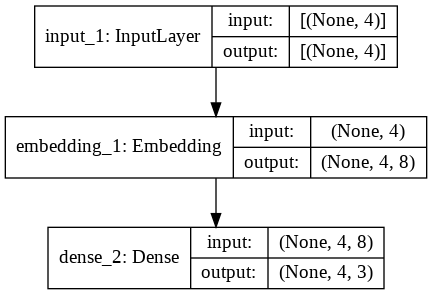

In [25]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)

# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 4, 8)              56        
_________________________________________________________________
dense_2 (Dense)              (None, 4, 3)              27        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 학습

In [27]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 0s 400ms/step - loss: 1.1022 - accuracy: 0.1250
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.1250
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0915 - accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0879 - accuracy: 0.3750
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0844 - accuracy: 0.3750
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0809 - accuracy: 0.3750
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0773 - accuracy: 0.3750
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0738 - accuracy: 0.6250
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0703 - accuracy: 0.6250
Epoch 11/100
1/1 [=========

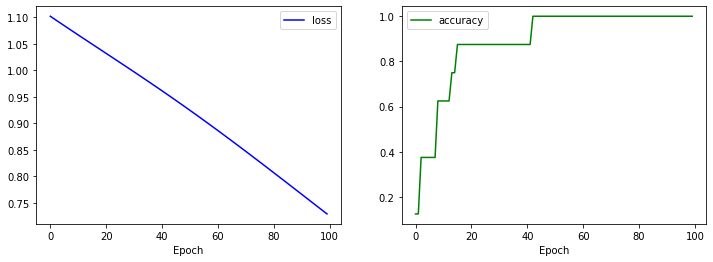

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [30]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 131ms/step - loss: 0.7248 - accuracy: 1.0000


[0.7248378396034241, 1.0]

## 예측

In [31]:
# 추론할 입력
string = '나는 기분이 우울해'

In [32]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [33]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [34]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [35]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.24994186, 0.52586186, 0.22419624],
        [0.25570872, 0.5057439 , 0.23854731],
        [0.35732964, 0.30531225, 0.33735815],
        [0.26257244, 0.49815172, 0.23927583]]], dtype=float32)

In [36]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])